<h2 style="color:green" align="center">Prédire si un PC est de bonne qualité ou non en utilisant les algorithmes de Machine Learning </h2>

# Importing required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas as pd
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#import metrics model to check the accuracy
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the dataset
Displaying dataset dimensions, shape, content summary etc

In [2]:
# reading given file and creating dataframe
dataset = pd.read_csv("PC-qualité.txt", header = None)

# adding column headings
dataset.columns = ['x0','x1','x2','x3','x4','x5','x6','x7','class']

# store dataframe into csv file
dataset.to_csv('PC-qualité.csv', index = None)

In [3]:
print("Shape:",dataset.shape)  ### Return the shape of data, Identify the number of features (columns) and samples (rows):
print("Dimensions:",dataset.ndim)   ### Return the n dimensions of data
print("Size:",dataset.size)   ### Return the size of data 
print("\n")
print("Count of empty fields:\n",dataset.isna().sum())  ### Returns the sum fo all na values
print("\n")
print("Summary of dataset:")
print(dataset.info())  ### Give concise summary of a DataFrame
print("\n")
print("Top 5 reviews:\n", dataset.head())  ## top 5 rows of the dataframe
print("\n")
print("Last 5 reviews:\n", dataset.tail()) ## bottom 5 rows of the dataframe
print("\n")
dataset.describe()

Shape: (768, 9)
Dimensions: 2
Size: 6912


Count of empty fields:
 x0       0
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
class    0
dtype: int64


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      768 non-null    int64  
 1   x1      768 non-null    int64  
 2   x2      768 non-null    int64  
 3   x3      768 non-null    int64  
 4   x4      768 non-null    int64  
 5   x5      768 non-null    float64
 6   x6      768 non-null    float64
 7   x7      768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Top 5 reviews:
    x0   x1  x2  x3   x4    x5     x6  x7  class
0   6  148  72  35    0  33.6  0.627  50      1
1   1   85  66  29    0  26.6  0.351  31      0
2   8  183  64   0    0  23.3  0.672  32      1
3   1   89  66  23   9

,x0,x1,x2,x3,x4,x5,x6,x7,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


the dataset is imbalanced, 
we will use imbalanced-learn library and radomundersampling

<AxesSubplot:xlabel='class', ylabel='count'>

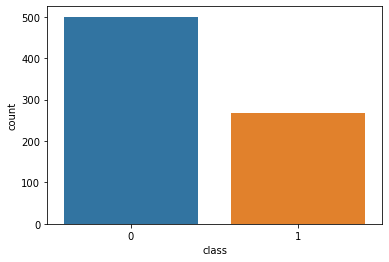

In [4]:
# Find if dataset is balanced or imbalanced (it is imbalanced)
sns.countplot(x='class',data=dataset)

1 means the quality is good and 0 means bad. We can identify that out of the 768 pc, 500 are labeled as 0 (bad) and 268 as 1 (good).

In [23]:
v = dataset['class'].value_counts()
print(v)

0    500
1    268
Name: class, dtype: int64


Before undersampling: 
class
0        348
1        189
dtype: int64
After undersampling:  Counter({'class': 1})
class
1        189
0        189
dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

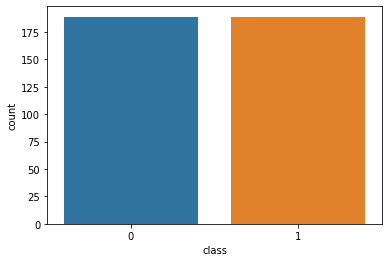

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
df = pd.read_csv('PC-qualité.csv')
# Separating the independent variables from dependent variables
X = dataset.drop(dataset.columns[8], axis=1)
y = dataset.drop(dataset.columns[:8], axis=1)
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
# summarize class distribution
print("Before undersampling: ")
v = y_train.value_counts()
print(v)
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
v = y_train_under.value_counts()
print(v)
sns.countplot(x='class',data=y_train_under)

Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.

In [35]:
corr = dataset.corr() #correlation plot
corr

,x0,x1,x2,x3,x4,x5,x6,x7,class
x0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
x1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
x2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
x3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
x4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
x5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
x6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
x7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [36]:
corr.shape

(9, 9)

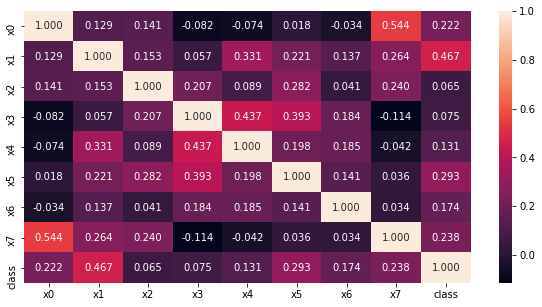

In [37]:
# the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt =".3f")
plt.show()

# Creating a model
Split dataset into training and testing models

In [38]:
#séparer dataset, input contient les 8 premieres colonnes
X_total = dataset.drop(dataset.columns[8], axis=1)
dx = pd.DataFrame(X_total)
print(dx)

     x0   x1  x2  x3   x4    x5     x6  x7
0     6  148  72  35    0  33.6  0.627  50
1     1   85  66  29    0  26.6  0.351  31
2     8  183  64   0    0  23.3  0.672  32
3     1   89  66  23   94  28.1  0.167  21
4     0  137  40  35  168  43.1  2.288  33
..   ..  ...  ..  ..  ...   ...    ...  ..
763  10  101  76  48  180  32.9  0.171  63
764   2  122  70  27    0  36.8  0.340  27
765   5  121  72  23  112  26.2  0.245  30
766   1  126  60   0    0  30.1  0.349  47
767   1   93  70  31    0  30.4  0.315  23

[768 rows x 8 columns]


In [39]:
#output: target, contient derniere colonne class
Y_total = dataset.drop(dataset.columns[:8], axis=1)
dy = pd.DataFrame(Y_total)
print(dy)

     class
0        1
1        0
2        1
3        0
4        1
..     ...
763      0
764      0
765      0
766      1
767      0

[768 rows x 1 columns]


*Splitting the dataset : The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset. We will do this using SciKit-Learn library in Python using the train_test_split method.


In [67]:
#les données sont séparées avec les proportions suivantes : 80 % pour le training set et 20 % pour le testing set.
x_train, x_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.2)

In [68]:
x_train.shape

(614, 8)

In [69]:
x_test.shape

(154, 8)

In [70]:
y_train.shape

(614, 1)

In [71]:
y_test.shape

(154, 1)

<strong>chercher les hyperparametres</strong>

pour KNN

In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model1knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.754592 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
0.691636 (0.054861) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.691636 (0.054861) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.703138 (0.053625) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.703675 (0.052076) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.722202 (0.057317) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.724899 (0.054552) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.733527 (0.055317) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.731359 (0.055887) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.732381 (0.047444) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.727569 (0.048732) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.735616 

In [73]:
KNN = KNeighborsClassifier(n_neighbors=17, metric= 'manhattan', weights= 'distance')
model4 = KNN.fit(x_train, y_train)

y_predKNN = KNN.predict(x_test)
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_predKNN))
print("Accuracy of KNN:",KNN.score(x_test,y_test))

# Evaluate based on accuracy, classification report and confusion matrix for KNN
cmKNN = confusion_matrix(y_test, y_predKNN)
scoreKNN = accuracy_score(y_test,y_predKNN)
cl_reportKNN = classification_report(y_test,y_predKNN)
print("Confusion matrix:\n",cmKNN)
print("Classification Report:\n",cl_reportKNN)
print("Accuracy of KNN: ",scoreKNN*100)
#Save model as pickle file
pickle.dump(KNN, open('KNN.pkl','wb'))
modelKNN = pickle.load(open('KNN.pkl','rb'))
# re-evaluate with trained model
y_pred_newKNN = modelKNN.predict(x_test)
print("Accuracy score modelKNN: ",modelKNN.score(x_test,y_test))

Accuracy of KNN: 0.7402597402597403
Accuracy of KNN: 0.7402597402597403
Confusion matrix:
 [[82 14]
 [26 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.70      0.55      0.62        58

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154

Accuracy of KNN:  74.02597402597402
Accuracy score modelKNN:  0.7402597402597403


SVM

In [84]:
from sklearn.svm import SVC
model2svc = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model2svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.764930 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.760118 (0.056680) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.754645 (0.049844) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.462498 (0.115465) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.759589 (0.051149) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.757395 (0.052736) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.458091 (0.097672) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.762216 (0.055533) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.764930 (0.049749) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.509184 (0.057880) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.752997 (0.046927) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.683474 (0.024842) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.657959 (0.002720) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.693751 (0.024164) with: {'C': 0.01, 'gamma': 'scale',

In [85]:
SVM = svm.SVC(C= 1.0, gamma= 'scale', kernel= 'rbf')
model3 = SVM.fit(x_train, y_train.values.ravel())
y_predSVM = SVM.predict(x_test)
print("Accuracy of SVM:",metrics.accuracy_score(y_test, y_predSVM))
print("Accuracy of SVM:",SVM.score(x_test,y_test))
# Evaluate based on accuracy, classification report and confusion matrix FOR SVM
cmSVM = confusion_matrix(y_test, y_predSVM)
scoreSVM = accuracy_score(y_test,y_predSVM)
cl_reportSVM = classification_report(y_test,y_predSVM)
print("Confusion matrix:\n",cmSVM)
print("Classification Report:\n",cl_reportSVM)
print("Accuracy of SVM: ",scoreSVM*100)
#Save model as pickle file
pickle.dump(SVM, open('SVM.pkl','wb'))
modelSVM = pickle.load(open('SVM.pkl','rb'))
# re-evaluate with trained model
y_pred_newSVM = modelSVM.predict(x_test)
print("Accuracy score modelKNN: ",modelSVM.score(x_test,y_test))

Accuracy of SVM: 0.7272727272727273
Accuracy of SVM: 0.7272727272727273
Confusion matrix:
 [[86 10]
 [32 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.80        96
           1       0.72      0.45      0.55        58

    accuracy                           0.73       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.73      0.71       154

Accuracy of SVM:  72.72727272727273
Accuracy score modelKNN:  0.7272727272727273


Random Forest Classifier

In [87]:
# define models and parameters
model3rf = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model3rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.762789 using {'max_features': 'log2', 'n_estimators': 1000}
0.743213 (0.047256) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.755755 (0.043741) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.761167 (0.044107) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.744800 (0.046939) with: {'max_features': 'log2', 'n_estimators': 10}
0.760603 (0.045952) with: {'max_features': 'log2', 'n_estimators': 100}
0.762789 (0.043273) with: {'max_features': 'log2', 'n_estimators': 1000}


In [81]:
# changement du type du y-train du colone-vecteur a un tableau de dim=1
y=np.ravel(y_train)
RFC = RandomForestClassifier(max_features= 'sqrt', n_estimators= 100)
model6 = RFC.fit(x_train, y)
y_predRFC = RFC.predict(x_test)
print("Accuracy of RFC:",metrics.accuracy_score(y_test, y_predRFC))
print("Accuracy of RFC:",RFC.score(x_test,y_test))
# Evaluate based on accuracy, classification report and confusion matrix FOR RFC
cmRFC = confusion_matrix(y_test, y_predRFC)
scoreRFC = accuracy_score(y_test,y_predRFC)
cl_reportRFC = classification_report(y_test,y_predRFC)
print("Confusion matrix:\n",cmRFC)
print("Classification Report:\n",cl_reportRFC)
print("Accuracy of RFC: ",scoreRFC*100)
#Save model as pickle file
pickle.dump(RFC, open('RFC.pkl','wb'))
modelRFC = pickle.load(open('RFC.pkl','rb'))
# re-evaluate with trained model
y_pred_newRFC = modelRFC.predict(x_test)
print("Accuracy score modelKNN: ",modelRFC.score(x_test,y_test))

Accuracy of RFC: 0.7662337662337663
Accuracy of RFC: 0.7662337662337663
Confusion matrix:
 [[81 15]
 [21 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        96
           1       0.71      0.64      0.67        58

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154

Accuracy of RFC:  76.62337662337663
Accuracy score modelKNN:  0.7662337662337663


Logistic Regression

In [90]:
LRA = LogisticRegression(solver='lbfgs',max_iter=10000)
model7 = LRA.fit(x_train, y_train.values.ravel())
y_predLRA = LRA.predict(x_test)
print("Accuracy of LRA:",metrics.accuracy_score(y_test, y_predLRA))
print("Accuracy of LRA:",LRA.score(x_test,y_test))
# Evaluate based on accuracy, classification report and confusion matrix FOR LRA
cmLRA = confusion_matrix(y_test, y_predLRA)
scoreLRA = accuracy_score(y_test,y_predLRA)
cl_reportLRA = classification_report(y_test,y_predLRA)
print("Confusion matrix:\n",cmLRA)
print("Classification Report:\n",cl_reportLRA)
print("Accuracy of LRA: ",scoreLRA*100)
#Save model as pickle file
pickle.dump(LRA, open('LRA.pkl','wb'))
modelLRA = pickle.load(open('LRA.pkl','rb'))
# re-evaluate with trained model
y_pred_newLRA = modelLRA.predict(x_test)
print("Accuracy score modelLRA: ",modelLRA.score(x_test,y_test))

Accuracy of LRA: 0.7532467532467533
Accuracy of LRA: 0.7532467532467533
Confusion matrix:
 [[84 12]
 [26 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82        96
           1       0.73      0.55      0.63        58

    accuracy                           0.75       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.75      0.74       154

Accuracy of LRA:  75.32467532467533
Accuracy score modelLRA:  0.7532467532467533


Decision Tree Algorithm

In [100]:
DTC = DecisionTreeClassifier()
model1 = DTC.fit(x_train, y_train)
y_predDTC = DTC.predict(x_test)
print("Accuracy of DecisionTree:",metrics.accuracy_score(y_test, y_predDTC))
print("Accuracy of DecisionTree:",DTC.score(x_test,y_test))
# Evaluate based on accuracy, classification report and confusion matrix for DTC
cmDTC = confusion_matrix(y_test, y_predDTC)
scoreDTC = accuracy_score(y_test,y_predDTC)
cl_reportDTC = classification_report(y_test,y_predDTC)
print("Confusion matrix:\n",cmDTC)
print("Classification Report:\n",cl_reportDTC)
print("Accuracy of DTC: ",scoreDTC*100)
#Save model as pickle file
pickle.dump(DTC, open('DTC.pkl','wb'))
modelDTC = pickle.load(open('DTC.pkl','rb'))
# re-evaluate with trained model
y_pred_newDTC = modelDTC.predict(x_test)
print("Accuracy score modelDTC: ",modelDTC.score(x_test,y_test))

Accuracy of DecisionTree: 0.7272727272727273
Accuracy of DecisionTree: 0.7272727272727273
Confusion matrix:
 [[75 21]
 [21 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        96
           1       0.64      0.64      0.64        58

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy of DTC:  72.72727272727273
Accuracy score modelKNN:  0.7272727272727273


GradientBoostingClassifier

In [101]:
GBC = GradientBoostingClassifier()
model2 = GBC.fit(x_train, y_train.values.ravel())
y_predGBC = GBC.predict(x_test)
print("Accuracy of GradientBoosting:",metrics.accuracy_score(y_test, y_predGBC))
print("Accuracy of GradientBoosting:",GBC.score(x_test,y_test))
# Evaluate based on accuracy, classification report and confusion matrix for GBC
cmGBC = confusion_matrix(y_test, y_predGBC)
scoreGBC = accuracy_score(y_test,y_predGBC)
cl_reportGBC = classification_report(y_test,y_predGBC)
print("Confusion matrix:\n",cmGBC)
print("Classification Report:\n",cl_reportGBC)
print("Accuracy of GBC: ",scoreGBC*100)
#Save model as pickle file
pickle.dump(GBC, open('GBC.pkl','wb'))
modelGBC = pickle.load(open('GBC.pkl','rb'))
# re-evaluate with trained model
y_pred_newGBC = modelGBC.predict(x_test)
print("Accuracy score modelGBC: ",modelGBC.score(x_test,y_test))

Accuracy of GradientBoosting: 0.7532467532467533
Accuracy of GradientBoosting: 0.7532467532467533
Confusion matrix:
 [[83 13]
 [25 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        96
           1       0.72      0.57      0.63        58

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Accuracy of GBC:  75.32467532467533
Accuracy score modelKNN:  0.7532467532467533


Naive Bayes

In [102]:
NBA = GaussianNB()
model5 = NBA.fit(x_train, y_train)
y_predNBA = NBA.predict(x_test)
print("Accuracy of NBA:",metrics.accuracy_score(y_test, y_predNBA))
print("Accuracy of NBA:",NBA.score(x_test,y_test))
# Evaluate based on accuracy, classification report and confusion matrix FOR NBA
cmNBA = confusion_matrix(y_test, y_predNBA)
scoreNBA = accuracy_score(y_test,y_predNBA)
cl_reportNBA = classification_report(y_test,y_predNBA)
print("Confusion matrix:\n",cmNBA)
print("Classification Report:\n",cl_reportNBA)
print("Accuracy of NBA: ",scoreNBA*100)
#Save model as pickle file
pickle.dump(NBA, open('NBA.pkl','wb'))
modelNBA = pickle.load(open('NBA.pkl','rb'))
# re-evaluate with trained model
y_pred_newNBA = modelNBA.predict(x_test)
print("Accuracy score modelNBA: ",modelNBA.score(x_test,y_test))

Accuracy of NBA: 0.7467532467532467
Accuracy of NBA: 0.7467532467532467
Confusion matrix:
 [[80 16]
 [23 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        96
           1       0.69      0.60      0.64        58

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.74      0.75      0.74       154

Accuracy of NBA:  74.67532467532467
Accuracy score modelKNN:  0.7467532467532467


In [106]:
results = pd.DataFrame()

tempresults = pd.DataFrame({'Algorithm': ['logistic Regression Method'], 'Accuracy':[modelLRA.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])

tempresults = pd.DataFrame({'Algorithm': ['Decision Tree Classifier Method'], 'Accuracy':[modelDTC.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])

tempresults = pd.DataFrame({'Algorithm': ['Random forest Classifier Method'], 'Accuracy':[modelRFC.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])

tempresults = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'], 'Accuracy':[modelSVM.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])

tempresults = pd.DataFrame({'Algorithm': ['Gaussian Naive Bayes Method'], 'Accuracy':[modelNBA.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])

tempresults = pd.DataFrame({'Algorithm': ['Gradien Boosting Classifier Method'], 'Accuracy':[modelGBC.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])

tempresults = pd.DataFrame({'Algorithm': ['KNN Method'], 'Accuracy':[modelKNN.score(x_test,y_test)]})
results = pd.concat( [results,tempresults])
results

,Algorithm,Accuracy
0,logistic Regression Method,0.753247
0,Decision Tree Classifier Method,0.727273
0,Random forest Classifier Method,0.766234
0,Support Vector Classifier Method,0.727273
0,Gaussian Naive Bayes Method,0.746753
0,Gradien Boosting Classifier Method,0.753247
0,KNN Method,0.740260


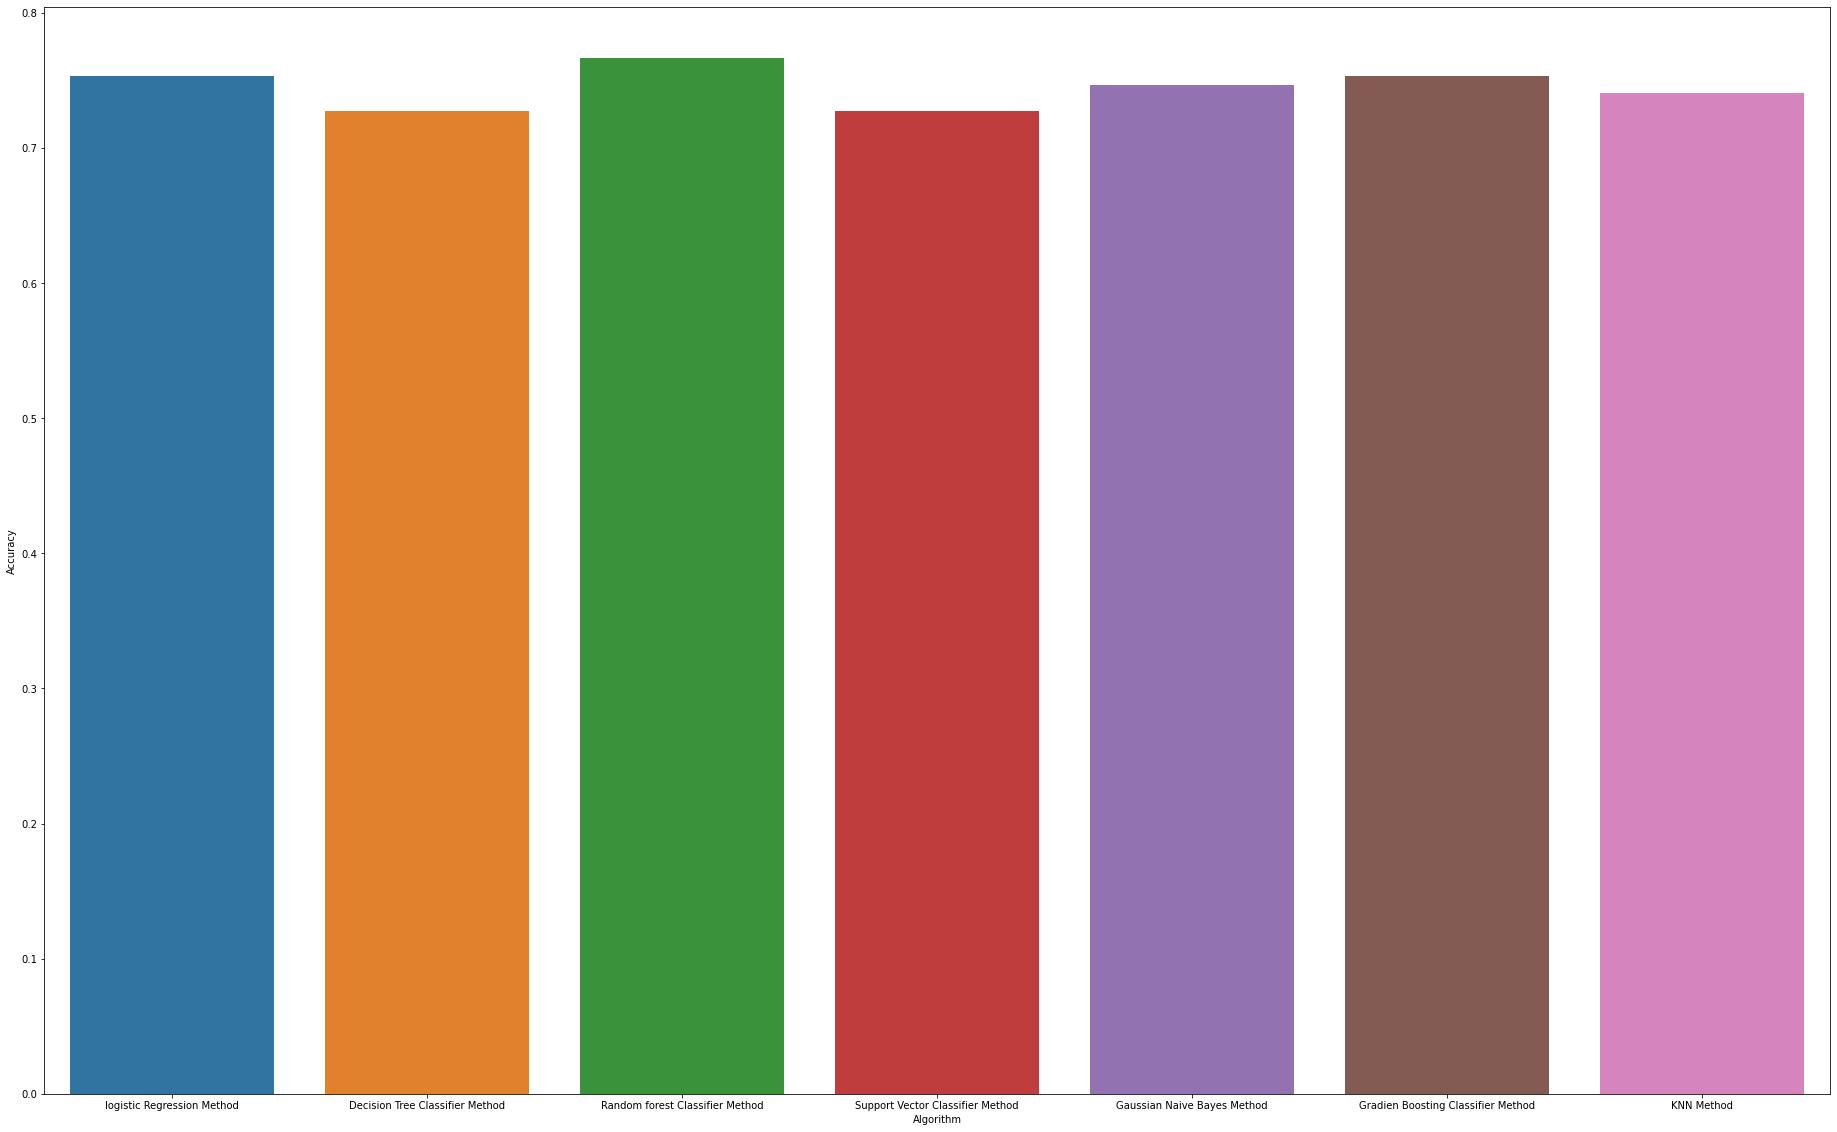

In [104]:
plt.figure(figsize=(32,20))
sns.barplot(x = "Algorithm", y = "Accuracy", data = results)
plt.show()